1.2 Since sine waves have energy at only one frequency (see Chapter 3), they can be used 
to probe the frequency characteristics of a filter (or other linear systems). Here, sine 
waves at several different frequencies are used as input to an analog filter. The input 
sine waves have a value of 1.0 V root mean square (RMS) and the output measured 
at each frequency is given below. Use MATLAB to plot the filter’s frequency characteristic. (As in all plots, label 
the axes correctly.) What type of filter is it? What is the cutoff frequency and order 
of this filter? Use the MATLAB grid function (grid on;) to help find the slope and 
cutoff frequency from the plot. [Hint: Since sine waves have energy at only one fre
quency, the frequency characteristics of the filter can be determined from the ratio 
of output to input (Equation 1.2). Take 20 log(Vout
 /Vin
 ) where Vin
 = 1.0 to get the 
gain in dB and use MATLAB’s semilogx to get a plot gain against log frequency. 
T
 his will allow you to estimate the spectral slope in dB/decade better.]

This is a highpass filter.
The cutoff frequency is approximately: 82.67 Hz
Slope of the Bode plot below cutoff frequency is: 96.80 dB/decade
The estimated order of the filter is: 4


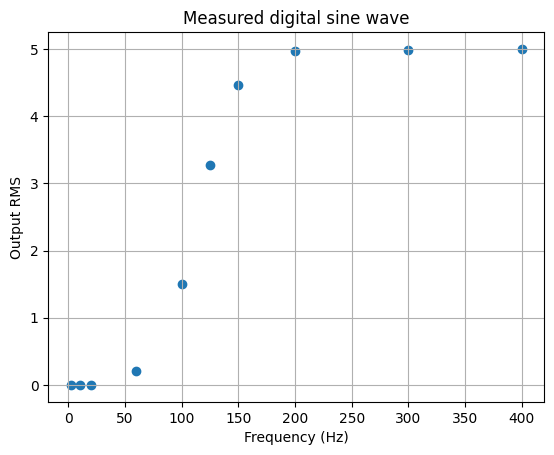

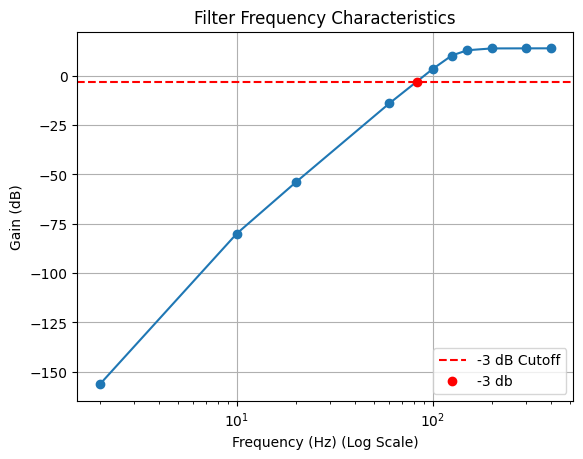

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

input_rms = 1
freq_output = [2,10,20,60,100,125,150,200,300,400]
output_rms = [0.15*10**(-7), 0.1*10**(-3), 0.002, 0.2, 1.5, 3.28, 4.47, 4.97, 4.99, 5.0]
output_rms

figure = plt.figure()
plt.scatter(freq_output, output_rms)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output RMS")
plt.title("Measured digital sine wave")

# Calculating gain
gain = 20 * np.log10(np.array(output_rms)/input_rms)
log_freq = np.log10(freq_output)

plt.figure()
plt.semilogx(freq_output, gain, marker="o")
plt.grid()
plt.xlabel("Frequency (Hz) (Log Scale)")
plt.ylabel("Gain (dB)")
plt.title("Filter Frequency Characteristics")
plt.axhline(-3, color="red", linestyle="--", label="-3 dB Cutoff")

# Finding cutoff frequency
cutoff_freq_db = -3
cutoff_freq_log = np.interp(cutoff_freq_db, gain, log_freq)
cutoff_freq =  10**cutoff_freq_log

plt.semilogx(cutoff_freq, cutoff_freq_db, "ro", label="-3 db")
plt.legend()

# Find the filter order by calculating slope of the bode plot
low_freq_range = (log_freq < cutoff_freq_log) 
slope_gain = linregress(log_freq[low_freq_range], gain[low_freq_range]).slope
filter_order = abs(slope_gain) // 20



print("This is a highpass filter.")
print(f"The cutoff frequency is approximately: {cutoff_freq:.2f} Hz")
print(f"Slope of the Bode plot below cutoff frequency is: {slope_gain:.2f} dB/decade")
print(f"The estimated order of the filter is: {filter_order:.0f}")

